## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [21]:


distance_df = pd.read_csv('/Users/shivanginimarjiwe/Desktop/repo/DataScienceGuidedCapstone/CosineSimilarityCaseStudy/distance_dataset (1).csv' , index_col=0)

distance_df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [31]:

# Display the matrices again using the correct method

# Create DataFrames for visualization
df_2D = pd.DataFrame(matrix_2D, columns=['Y', 'Z'])
df_3D = pd.DataFrame(matrix_3D, columns=['X', 'Y', 'Z'])


# Display 2D Matrix (Y, Z)
print("2D Matrix (Y, Z):")
print(df_2D.head())

# Display 3D Matrix (X, Y, Z)
print("\n3D Matrix (X, Y, Z):")
print(df_3D.head())



2D Matrix (Y, Z):
          Y         Z
0  4.167542  5.787635
1  5.770909  6.091044
2  7.540436  3.247239
3  5.069249  5.768313
4  2.402374  3.879101

3D Matrix (X, Y, Z):
          X         Y         Z
0  5.135779  4.167542  5.787635
1  4.280721  5.770909  6.091044
2  8.329098  7.540436  3.247239
3  5.470224  5.069249  5.768313
4  2.381797  2.402374  3.879101


Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [41]:
#simCosine3D = 1.0 - cosine_similarity(matrix_3D, [[5,5,5]], 'cosine')
#simCosine = 1.0 - cosine_similarity(matrix_2D, [[5,5]], 'cosine')




# Define reference vectors
reference_vector_2D = np.array([[5, 5]])
reference_vector_3D = np.array([[5, 5, 5]])

# Compute cosine similarity and subtract from 1
simCosine_2D = 1.0 - cosine_similarity(matrix_2D, reference_vector_2D)
simCosine_3D = 1.0 - cosine_similarity(matrix_3D, reference_vector_3D)

# Convert to DataFrame for better visualization
df_sim_2D = pd.DataFrame(simCosine_2D, columns=['SimCosine_2D'])
df_sim_3D = pd.DataFrame(simCosine_3D, columns=['SimCosine_3D'])

# Display the results
print("Cosine Similarity (2D - YZ Plane) Subtracted from 1:")
display(df_sim_2D.head())

print("\nCosine Similarity (3D - XYZ Plane) Subtracted from 1:")
display(df_sim_3D.head())


Cosine Similarity (2D - YZ Plane) Subtracted from 1:


,SimCosine_2D
0,0.012985
1,0.000364
2,0.070875
3,0.002074
4,0.026539



Cosine Similarity (3D - XYZ Plane) Subtracted from 1:


,SimCosine_3D
0,0.008640
1,0.010576
2,0.056269
3,0.001385
4,0.028225


Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

<Figure size 1000x800 with 0 Axes>

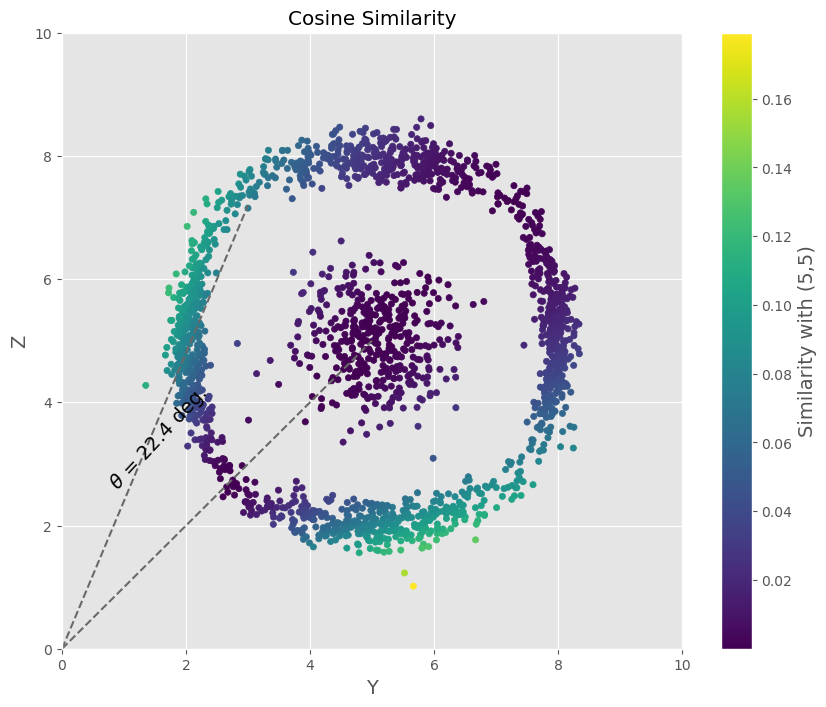

In [45]:
figCosine = plt.figure(figsize=[10,8])

#plt.scatter(df.Y, df.Z, c=simCosine[:,0], s=20)
plt.scatter(distance_df.Y, distance_df.Z, c=simCosine_2D[:,0], s=20, cmap='viridis')

plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.7,2.6,r'$\theta$ = 22.4 deg.', rotation=47, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)

#figCosine.savefig('similarity-cosine.png')




# Show the plot
plt.show()


Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

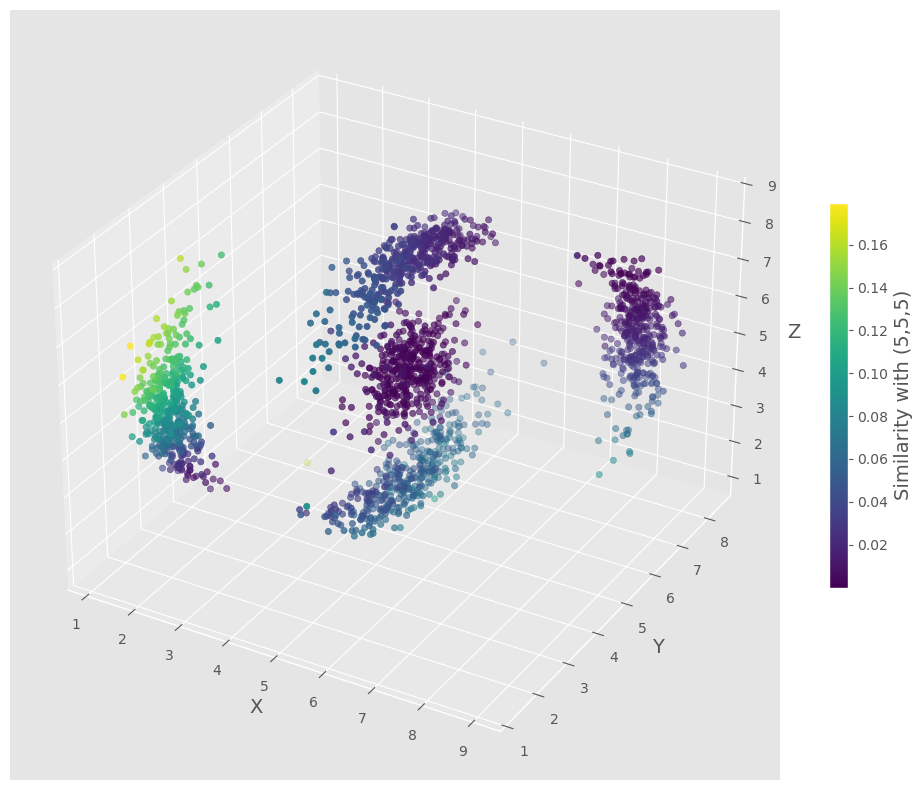

In [51]:
from mpl_toolkits.mplot3d import Axes3D
figCosine3D = plt.figure(figsize=(10, 8))
ax = figCosine3D.add_subplot(111, projection='3d')

#p = ax.scatter(mat[:,0], mat[:,1], mat[:,2], c=simCosine3D[:,0])
p = ax.scatter(distance_df.X, distance_df.Y, distance_df.Z, c=simCosine_3D[:,0], cmap='viridis', s=20)
ax.set_xlabel('X', size=14)
ax.set_ylabel('Y', size=14)
ax.set_zlabel('Z', size=14)
cb = figCosine3D.colorbar(p, ax=ax, shrink=0.5)
cb.set_label('Similarity with (5,5,5)', size=14)
                                   
figCosine3D.tight_layout()
#figCosine3D.savefig('cosine-3D.png', dpi=300, transparent=True)
plt.show()

----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

corpus = [Document1,Document2]

X_train_counts = count_vect.fit_transform(corpus)

pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names_out(),index=['Document 0','Document 1'])



,coffee,essence,of,starbucks
Document 0,1,0,0,1
Document 1,1,1,1,0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names_out(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,0.579739,0.000000,0.000000,0.814802
Document 1,0.449436,0.631667,0.631667,0.000000


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [67]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

In [86]:
# Define new documents for comparison
Document1_new = "Artificial intelligence is transforming the world of technology."
Document2_new = "Machine learning, a subset of AI, is widely used in data science."

# Create a new corpus
corpus_new = [Document1_new, Document2_new]

# Initialize TF-IDF Vectorizer and transform the new text into vectors
vectorizer_new = TfidfVectorizer()
trsfm_new = vectorizer_new.fit_transform(corpus_new)

# Convert to DataFrame for visualization
df_tfidf_new = pd.DataFrame(trsfm_new.toarray(), 
                            columns=vectorizer_new.get_feature_names_out(), 
                            index=['Document 0', 'Document 1'])

# Compute cosine similarity between Document 0 and all other documents
cosine_sim_tfidf_new = cosine_similarity(trsfm_new[0:1], trsfm_new)

# Convert to DataFrame for better readability
df_cosine_sim_tfidf_new = pd.DataFrame(cosine_sim_tfidf_new, columns=['Document 0', 'Document 1'], index=['Document 0'])

# Display the new TF-IDF matrix and cosine similarity results

print("New TF-IDF Matrix:")
display(df_tfidf_new)

print("\nNew Cosine Similarity (TF-IDF):")
display(df_cosine_sim_tfidf_new)


New TF-IDF Matrix:


,ai,artificial,data,in,intelligence,is,learning,machine,of,science,subset,technology,the,transforming,used,widely,world
Document 0,0.00000,0.377628,0.00000,0.00000,0.377628,0.268685,0.00000,0.00000,0.268685,0.00000,0.00000,0.377628,0.377628,0.377628,0.00000,0.00000,0.377628
Document 1,0.31603,0.000000,0.31603,0.31603,0.000000,0.224858,0.31603,0.31603,0.224858,0.31603,0.31603,0.000000,0.000000,0.000000,0.31603,0.31603,0.000000



New Cosine Similarity (TF-IDF):


,Document 0,Document 1
Document 0,1.0,0.120832


 **<font color='teal'> Combine the documents into a corpus.</font>**

In [90]:
# Combine the new documents into a single corpus (list of documents)
corpus_combined = [Document1_new, Document2_new]

# Display the combined corpus
df_corpus_combined = pd.DataFrame(corpus_combined, columns=['Text'], index=['Document 0', 'Document 1'])

# Show the combined corpus
print("Combined Corpus:")
display(df_corpus_combined)


Combined Corpus:


,Text
Document 0,Artificial intelligence is transforming the wo...
Document 1,"Machine learning, a subset of AI, is widely us..."


 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer and transform the text into vectors
count_vect_expanded = CountVectorizer()
X_train_counts_expanded = count_vect_expanded.fit_transform(corpus_combined)

# Convert to DataFrame for visualization
df_word_counts_expanded = pd.DataFrame(X_train_counts_expanded.toarray(), 
                                       columns=count_vect_expanded.get_feature_names_out(), 
                                       index=['Document 0', 'Document 1'])

# Display the word count matrix
display(df_word_counts_expanded)


,ai,artificial,data,in,intelligence,is,learning,machine,of,science,subset,technology,the,transforming,used,widely,world
Document 0,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,0,1
Document 1,1,0,1,1,0,1,1,1,1,1,1,0,0,0,1,1,0


 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [96]:
# Convert Count Vectorized matrix to a Pandas DataFrame
df_word_counts = pd.DataFrame(X_train_counts_expanded.toarray(), 
                              columns=count_vect_expanded.get_feature_names_out(), 
                              index=['Document 0', 'Document 1'])

# Display the DataFrame
display(df_word_counts)


,ai,artificial,data,in,intelligence,is,learning,machine,of,science,subset,technology,the,transforming,used,widely,world
Document 0,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,0,1
Document 1,1,0,1,1,0,1,1,1,1,1,1,0,0,0,1,1,0


 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [98]:
# Initialize TF-IDF Vectorizer and transform the text into vectors
vectorizer_tfidf = TfidfVectorizer()
tfidf_transformed = vectorizer_tfidf.fit_transform(corpus_combined)

# Convert to DataFrame for visualization
df_tfidf_transformed = pd.DataFrame(tfidf_transformed.toarray(), 
                                    columns=vectorizer_tfidf.get_feature_names_out(), 
                                    index=['Document 0', 'Document 1'])

# Display the TF-IDF matrix
display(df_tfidf_transformed)


,ai,artificial,data,in,intelligence,is,learning,machine,of,science,subset,technology,the,transforming,used,widely,world
Document 0,0.00000,0.377628,0.00000,0.00000,0.377628,0.268685,0.00000,0.00000,0.268685,0.00000,0.00000,0.377628,0.377628,0.377628,0.00000,0.00000,0.377628
Document 1,0.31603,0.000000,0.31603,0.31603,0.000000,0.224858,0.31603,0.31603,0.224858,0.31603,0.31603,0.000000,0.000000,0.000000,0.31603,0.31603,0.000000


 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [100]:
# Compute cosine similarity between all documents using the TF-IDF matrix
cosine_sim_tfidf_final = cosine_similarity(tfidf_transformed)

# Convert to DataFrame for better readability
df_cosine_sim_tfidf_final = pd.DataFrame(cosine_sim_tfidf_final, 
                                         columns=['Document 0', 'Document 1'], 
                                         index=['Document 0', 'Document 1'])

# Display the cosine similarity matrix
display(df_cosine_sim_tfidf_final)


,Document 0,Document 1
Document 0,1.000000,0.120832
Document 1,0.120832,1.000000


In [ ]:
Observation:

a) 1.0 on the diagonal → Each document is 100% similar to itself (expected).

b) 0.1208 similarity between Document 0 & Document 1:

   This means Document 0 and Document 1 have 12.08% similarity based on the words they share.
   Since 0.1208 is relatively low, it suggests the documents have different word distributions and are not very similar.